In [84]:
import numpy as np
from matplotlib import pyplot as plt
import operator as op
from scipy.misc import comb as ncr
from matplotlib.colors import LogNorm
%matplotlib inline

## Problem 1

In [85]:
data = np.load('anscombe.npy')

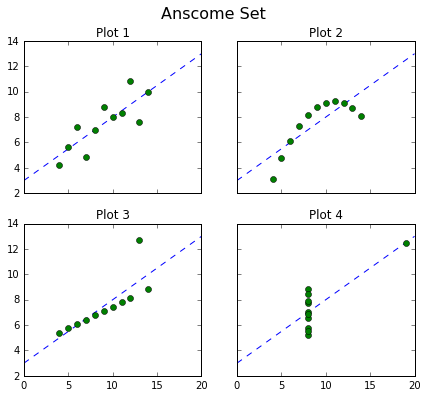

In [86]:
x = np.linspace(0,20)
y = x/2+3

fig,ax = plt.subplots(2,2,sharex=True,sharey=True)
fig.set_figwidth(7)
fig.set_figheight(6)

plt.subplot(221)
plt.title('Plot 1')
plt.plot(x,y, '--')
plt.tick_params(labelbottom='off')
#plt.axes([4,20,2,14])
plt.plot(data[:,0],data[:,1], 'o', lw=0)

plt.subplot(222)
plt.title('Plot 2')
plt.plot(x,y, '--')
#plt.axes([4,20,2,14])
plt.tick_params(labelbottom='off', labelleft='off')
plt.plot(data[:,2],data[:,3], 'o')

plt.subplot(223)
plt.plot(x,y, '--')
#plt.axes([4,20,2,14])
plt.title('Plot 3')
plt.plot(data[:,4],data[:,5], 'o')

plt.subplot(224)
plt.plot(x,y, '--')
#plt.axes([4,20,2,14])
plt.title('Plot 4')
plt.tick_params(labelleft='off')
plt.plot(data[:,6],data[:,7], 'o')

plt.suptitle(r"Anscome Set".format(''), fontsize=16)
plt.show()

Plot 1 appears to actually be a good candidate for a linear regression. It has somewhat random points, it appears.  
Plot 2 appears to be quadratic.  
Plot 3 is almost a perfect line except for an outlying y-value.  
Plot 4 is almost a vertical line, but there is an outlying x-value.


## Problem 2

In [87]:
def B_n(n, k, x):
    return ncr(n,k) * x**k * (1-x)**(n-k)

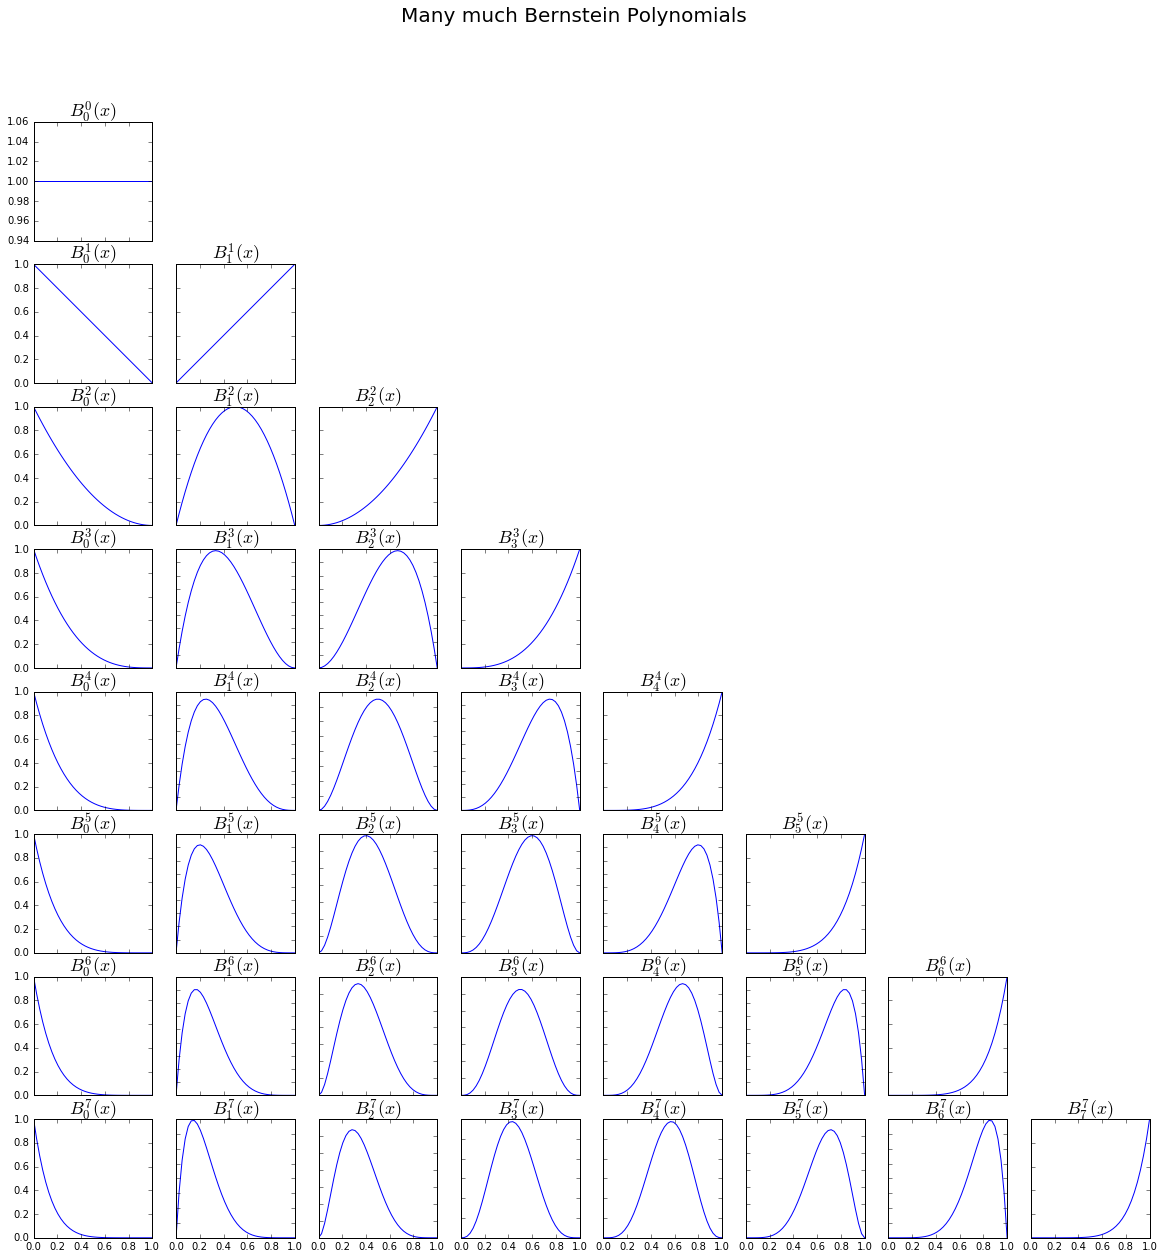

In [112]:
x = np.linspace(0,1,40)
n = 8

fig,ax = plt.subplots(sharex=True,sharey=True)

fig.set_figwidth(20)
fig.set_figheight(20)

for i in range(n):
    for j in range(i+1):
        plt.subplot(n,n,n*i+j+1)
        y = B_n(i, j, x)
        plt.plot(x,y)
        plt.title(r'$B^{}_{}(x)$'.format(i,j), fontsize=18)
        
        if i != n-1:
            plt.tick_params(labelbottom='off')
        if j != 0:
            plt.tick_params(labelleft='off')
plt.suptitle('Many much Bernstein Polynomials', fontsize=20)
plt.show()

### Problem 3

In [89]:
data = np.load('MLB.npy')
height, weight, age = data.T

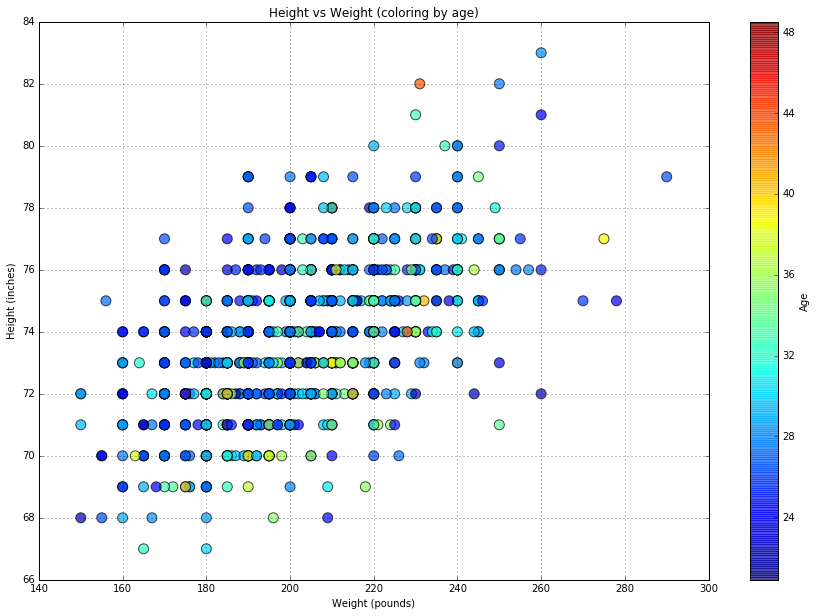

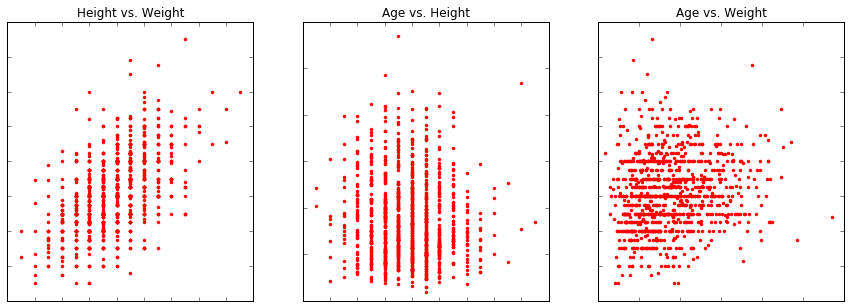

In [90]:
#plt.subplot(221)
plt.figure(figsize=(15,10))
plt.title("Height vs Weight (coloring by age)")
plt.scatter(weight, height, c=age, s=100, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Age')
plt.grid()
plt.tick_params(labelleft='on')
plt.tick_params(labelbottom='on')
plt.xlabel('Weight (pounds)')
plt.ylabel('Height (inches)')
#plt.axis([0,300,0,85])
plt.show()

fig,ax = plt.subplots(1,3,sharex=True,sharey=True)
fig.set_figwidth(15)
fig.set_figheight(5)

plt.subplot(131)
plt.title('Height vs. Weight')
plt.tick_params(labelleft='off')
plt.tick_params(labelbottom='off')
plt.plot(height, weight, 'r.')


plt.subplot(132)
plt.title('Age vs. Height')
plt.tick_params(labelleft='off')
plt.tick_params(labelbottom='off')
plt.plot(height, age, 'r.')


plt.subplot(133)
plt.title('Age vs. Weight')
plt.tick_params(labelleft='off')
plt.tick_params(labelbottom='off')
plt.plot(age, weight, 'r.')
plt.show()


### Conclusion  
There is no noticeable correlation between age and weight or between age and height among MLB players. But there is a noticeable positive correlation between weight and height, as would be expected.

## Problem 4

In [91]:
data = np.load('earthquakes.npy')
year, mag, longs, lats = data.T

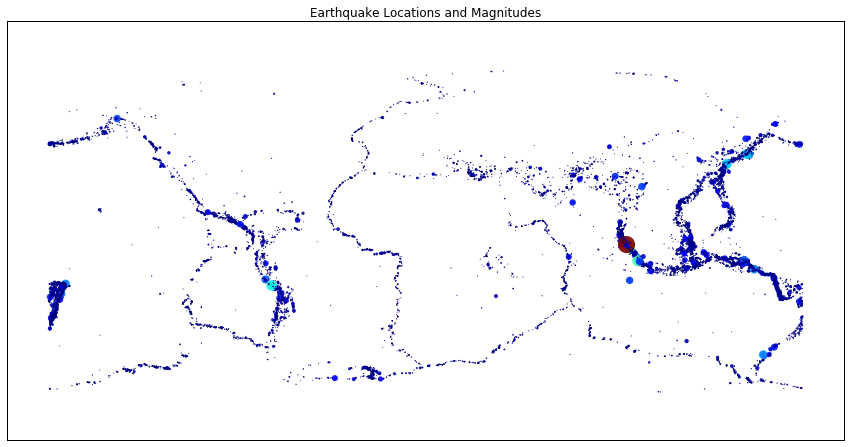

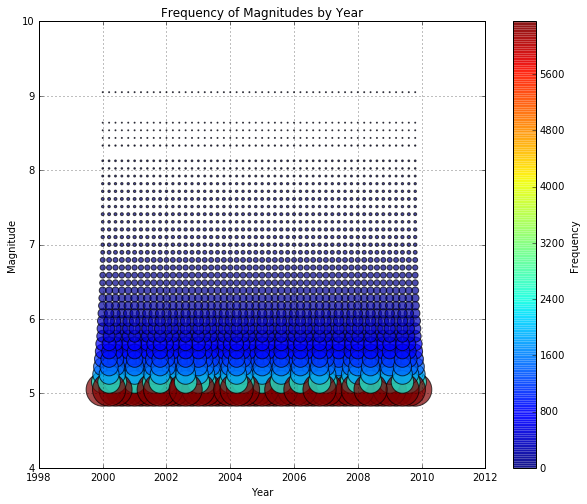

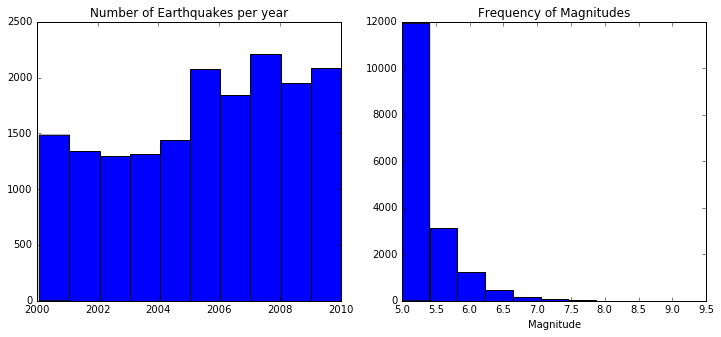

In [105]:
#the map graph
plt.figure(figsize=(15,7.5))
plt.axis('equal')
plt.scatter(longs, lats, s=4**(mag-5), c=4**(mag-4), alpha=0.9, lw=0)
plt.title('Earthquake Locations and Magnitudes')
plt.tick_params(axis='both', bottom = 'off', top = 'off', left = 'off', right='off', labelbottom='off', labelleft='off')
plt.show()

#fequency of magnitudes by year
dct = {}
b = 40
y_edge = 5.0
for i,y in enumerate(year):
    y = int(y*y_edge)/y_edge
    if y not in dct:
        dct[y] = []
    dct[y].append(mag[i])

plt.figure(figsize=(10,8))
for i in dct:
    freq, bins = np.histogram(mag, bins=b)
    plt.scatter([i]*len(freq) , bins[1:]/2.+bins[:-1]/2., c=freq, s=freq**0.8, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Frequency')
plt.title('Frequency of Magnitudes by Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(5)
plt.subplot(121)
plt.hist(year, bins=10)
plt.title('Number of Earthquakes per year')

plt.subplot(122)
plt.hist(mag, bins=10)
plt.xlabel("Magnitude")
plt.title('Frequency of Magnitudes')
plt.show()

## Problem 5

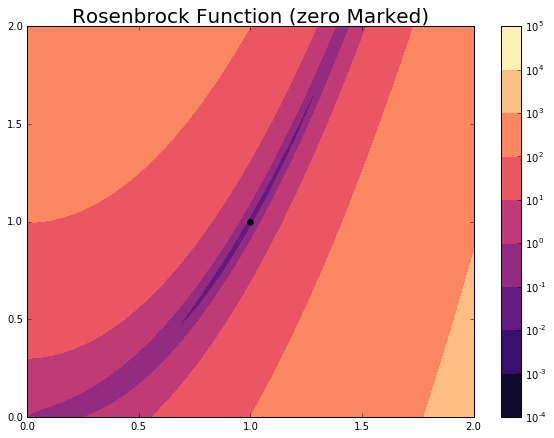

In [93]:
x = np.linspace(0,2,200)
X, Y = np.meshgrid(x, x.copy())
Z = (1-X)**2 + 100*(Y-X**2)**2

plt.figure(figsize=(10,7))
plt.contourf(X, Y, Z, 6, cmap='magma', norm=LogNorm())
plt.plot(1,1,'ko', ms=6)
plt.colorbar()
plt.title('Rosenbrock Function (zero Marked)', fontsize=20)
plt.show()

## Problem 6

In [94]:
countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]
data = np.load('countries.npy')
pop_mil, gdp_bil, avg_male_h, avg_fem_h = data.T

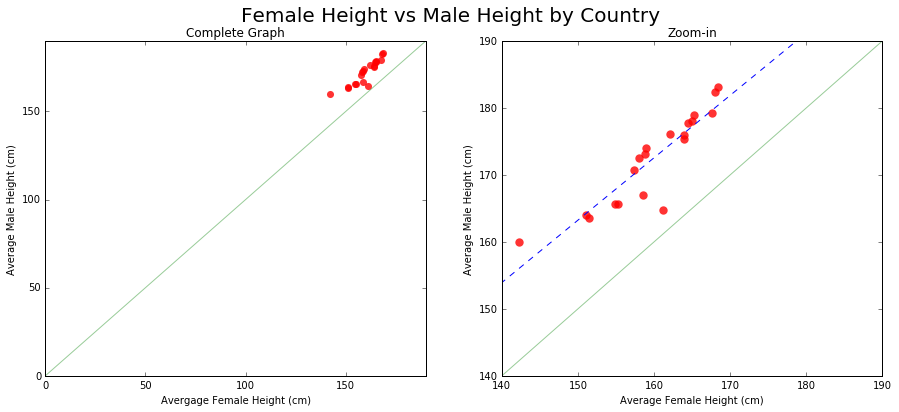

In [95]:
x,y = avg_fem_h, avg_male_h

fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)

#plt.figure(figsize= (5,4.5))
plt.subplot(121)
plt.scatter(x, y, c='r', s=50, alpha=0.8, lw=0)
plt.plot([0,190],[0,190], alpha=0.4, c='g')
plt.axis([0,190,0,190])
plt.title('Complete Graph')
plt.xlabel('Avergage Female Height (cm)')
plt.ylabel('Average Male Height (cm)')
#plt.show()

plt.subplot(122)
plt.scatter(x, y, c='r', s=70, alpha=0.8, lw=0)
plt.plot([0,190],[0,190], alpha=0.4, c='g')
plt.axis([140,190,140,190])
coef = np.polyfit(x,y,1)
p = np.poly1d(coef)
domain = np.linspace(100,200,100)
plt.plot(domain,p(domain), '--')
plt.title('Zoom-in')
plt.ylabel('Average Male Height (cm)')
plt.xlabel('Average Female Height (cm)')

plt.suptitle("Female Height vs Male Height by Country", fontsize=20)
plt.show()

From these two graphs, the second being a zoom-in of the first, we gather that there is a strong correlation between the average height of males and the average height of females in a given country. Furthermore, we can deduce that men are generally taller than the women of their respective countries.

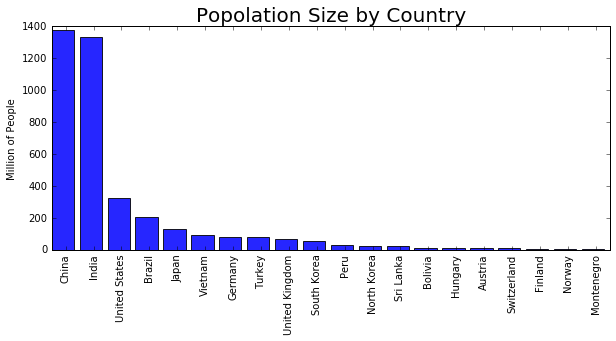

In [107]:
val = pop_mil
order = np.argsort(val)[::-1]
ar = np.arange(len(val))
plt.figure(figsize=(10,4))
plt.bar(ar, val[order], alpha=0.85)
countries_ord = [countries[i] for i in order]
plt.xticks(ar+0.5, countries_ord, rotation='vertical')
plt.ylabel('Million of People')
plt.title('Popolation Size by Country', fontsize=20)
plt.show()

This graph shows a clear and stark difference in population sizes. Two outliers, China and India, have more than two thirds of the total population of the given countries.

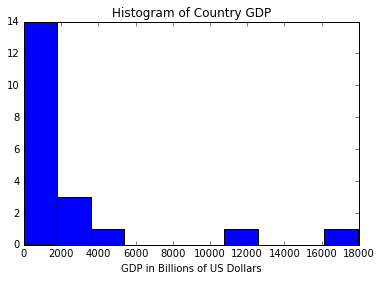

In [97]:
plt.hist(gdp_bil, bins=10)
plt.xlabel('GDP in Billions of US Dollars')
plt.title('Histogram of Country GDP')
plt.show()

Clearly the most common GDP is below 2 trillion dollars. The largest belongs to the United States, and the second largest belongs to China, but the other countries fall far behind these two. The histogram is very skew right.

## Let's see how much info we can put into a single graph...

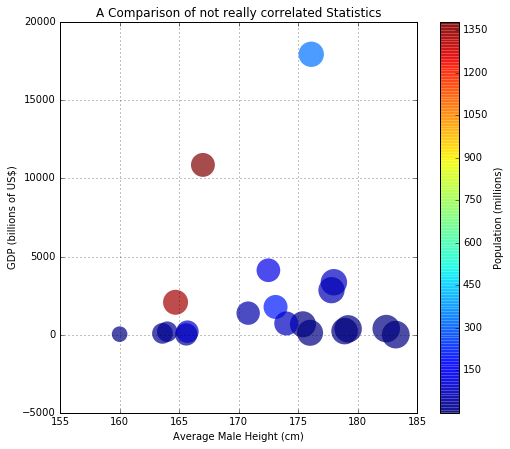

In [110]:
plt.figure(figsize=(8,7))
plt.scatter(avg_male_h, gdp_bil, c=pop_mil, s=20*(avg_fem_h-130), lw=0, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Population (millions)')
plt.grid()
plt.ylabel('GDP (billions of US$)')
plt.xlabel('Average Male Height (cm)')
plt.title('A Comparison of not really correlated Statistics')
plt.show()